In [1]:
import os
import glob
import pandas as pd

# Loading Datasets

In [2]:
dfabuja = pd.read_csv('abuja.csv', index_col=0)

In [3]:
dflagos = pd.read_csv('lagos.csv', index_col=0)
dfpharc = pd.read_csv('pharc.csv', index_col=0)

In [4]:
df = pd.concat([dfabuja, dflagos, dfpharc])

In [5]:
df.to_csv('companyxyz.csv')

In [6]:
xyz = pd.read_csv('companyxyz.csv', index_col=0 )

# Data Exploration

In [7]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('fivethirtyeight')  
import warnings
warnings.filterwarnings('ignore')

In [8]:
#checking the first five rows
xyz.head()

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,692-92-5582,B,Abuja,Member,Female,Food and beverages,19742.4,3,2961.36,62188.56,2/20/2019,13:27,Card,59227.2,4.761905,2961.36,5.9
1,351-62-0822,B,Abuja,Member,Female,Fashion accessories,5212.8,4,1042.56,21893.76,2/6/2019,18:07,Epay,20851.2,4.761905,1042.56,4.5
2,529-56-3974,B,Abuja,Member,Male,Electronic accessories,9183.6,4,1836.72,38571.12,3/9/2019,17:03,Cash,36734.4,4.761905,1836.72,6.8
3,299-46-1805,B,Abuja,Member,Female,Sports and travel,33739.2,6,10121.76,212556.96,1/15/2019,16:19,Cash,202435.2,4.761905,10121.76,4.5
4,319-50-3348,B,Abuja,Normal,Female,Home and lifestyle,14508.0,2,1450.80,30466.80,3/11/2019,15:30,Epay,29016.0,4.761905,1450.80,4.4


In [9]:
#checking the number of rows and columns
xyz.shape

(1000, 17)

In [10]:
#generating the list of columns
xyz.columns

Index(['Invoice ID', 'Branch', 'City', 'Customer type', 'Gender',
       'Product line', 'Unit price', 'Quantity', 'Tax 5%', 'Total', 'Date',
       'Time', 'Payment', 'cogs', 'gross margin percentage', 'gross income',
       'Rating'],
      dtype='object')

In [11]:
#exploring the statistical summary
xyz.describe()

,Unit price,Quantity,Tax 5%,Total,cogs,gross margin percentage,gross income,Rating
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1.000000e+03,1000.000000,1000.00000
mean,20041.966800,5.510000,5536.572840,116268.029640,110731.456800,4.761905e+00,5536.572840,6.97270
std,9538.066205,2.923431,4215.177173,88518.720636,84303.543463,6.131498e-14,4215.177173,1.71858
min,3628.800000,1.000000,183.060000,3844.260000,3661.200000,4.761905e+00,183.060000,4.00000
25%,11835.000000,3.000000,2132.955000,44792.055000,42659.100000,4.761905e+00,2132.955000,5.50000
50%,19882.800000,5.000000,4351.680000,91385.280000,87033.600000,4.761905e+00,4351.680000,7.00000
75%,28056.600000,8.000000,8080.290000,169686.090000,161605.800000,4.761905e+00,8080.290000,8.50000
max,35985.600000,10.000000,17874.000000,375354.000000,357480.000000,4.761905e+00,17874.000000,10.00000


# Statistical Summary

The average unit price is 20041.966800.
The average quantity is 5.510000.
The average tax = The average gross income = 5536.572840.
The minimum unit price is 3628.800000 while the maximum unit price is 35985.600000.

In [12]:
#checking for missing data
xyz.isnull().sum()

Invoice ID                 0
Branch                     0
City                       0
Customer type              0
Gender                     0
Product line               0
Unit price                 0
Quantity                   0
Tax 5%                     0
Total                      0
Date                       0
Time                       0
Payment                    0
cogs                       0
gross margin percentage    0
gross income               0
Rating                     0
dtype: int64

xyz.notnull().sum()

#### No missing data

In [13]:
#checking the data information

xyz.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1000 entries, 0 to 327
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Invoice ID               1000 non-null   object 
 1   Branch                   1000 non-null   object 
 2   City                     1000 non-null   object 
 3   Customer type            1000 non-null   object 
 4   Gender                   1000 non-null   object 
 5   Product line             1000 non-null   object 
 6   Unit price               1000 non-null   float64
 7   Quantity                 1000 non-null   int64  
 8   Tax 5%                   1000 non-null   float64
 9   Total                    1000 non-null   float64
 10  Date                     1000 non-null   object 
 11  Time                     1000 non-null   object 
 12  Payment                  1000 non-null   object 
 13  cogs                     1000 non-null   float64
 14  gross margin percentage  

# Dealing with DateTime features

In [14]:
import datetime as dt

In [15]:
#converting the Date column to datetime

xyz['Date'] = pd.to_datetime(xyz['Date'])

In [16]:
#checking to confirm the change

xyz['Date'].dtype

dtype('<M8[ns]')

In [17]:
#converting the Time to datetime
xyz['Time'] = pd.to_datetime(xyz['Time'])

In [18]:
#checking to confirm the change
xyz['Time'].dtype

dtype('<M8[ns]')

###  Extracting features from date & time

In [19]:
#extracting the day
xyz['Day'] = xyz['Date'].dt.day

In [20]:
#extracting the month
xyz['Month'] = xyz['Date'].dt.month

In [21]:
#extracting the year
xyz['Year'] = xyz['Date'].dt.year

In [22]:
#extracting the hour
xyz['Hour'] = xyz['Time'].dt.hour

In [23]:
xyz.head()

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,...,Time,Payment,cogs,gross margin percentage,gross income,Rating,Day,Month,Year,Hour
0,692-92-5582,B,Abuja,Member,Female,Food and beverages,19742.4,3,2961.36,62188.56,...,2022-05-02 13:27:00,Card,59227.2,4.761905,2961.36,5.9,20,2,2019,13
1,351-62-0822,B,Abuja,Member,Female,Fashion accessories,5212.8,4,1042.56,21893.76,...,2022-05-02 18:07:00,Epay,20851.2,4.761905,1042.56,4.5,6,2,2019,18
2,529-56-3974,B,Abuja,Member,Male,Electronic accessories,9183.6,4,1836.72,38571.12,...,2022-05-02 17:03:00,Cash,36734.4,4.761905,1836.72,6.8,9,3,2019,17
3,299-46-1805,B,Abuja,Member,Female,Sports and travel,33739.2,6,10121.76,212556.96,...,2022-05-02 16:19:00,Cash,202435.2,4.761905,10121.76,4.5,15,1,2019,16
4,319-50-3348,B,Abuja,Normal,Female,Home and lifestyle,14508.0,2,1450.80,30466.80,...,2022-05-02 15:30:00,Epay,29016.0,4.761905,1450.80,4.4,11,3,2019,15


In [24]:
#extracting the number of unique hour of sales
xyz['Hour'].nunique()

11

In [25]:
xyz['Hour'].unique()

array([13, 18, 17, 16, 15, 10, 12, 19, 14, 11, 20], dtype=int64)

In [26]:
categorical_columns = [col for col in xyz.columns if xyz[col].dtype == "object" ]
categorical_columns

['Invoice ID',
 'Branch',
 'City',
 'Customer type',
 'Gender',
 'Product line',
 'Payment']

In [27]:
xyz['Branch'].unique().tolist()

['B', 'A', 'C']

In [28]:
print("Total Number of unique values in the Branch Column : {}". format(len(df['Branch'].unique().tolist())))

Total Number of unique values in the Branch Column : 3


In [29]:
xyz['City'].unique().tolist()

['Abuja', 'Lagos', 'Port Harcourt']

In [30]:
print("Total Number of unique values in the City Column : {}". format(len(df['City'].unique().tolist())))

Total Number of unique values in the City Column : 3


In [31]:
xyz['Customer type'].unique().tolist()

['Member', 'Normal']

In [32]:
print("Total Number of unique values in the Customer type Column : {}". format(len(df['Customer type'].unique().tolist())))

Total Number of unique values in the Customer type Column : 2


In [33]:
xyz['Gender'].unique().tolist()

['Female', 'Male']

In [34]:
print("Total Number of unique values in the Gender Column : {}". format(len(df['Gender'].unique().tolist())))

Total Number of unique values in the Gender Column : 2


In [35]:
xyz['Product line'].unique().tolist()

['Food and beverages',
 'Fashion accessories',
 'Electronic accessories',
 'Sports and travel',
 'Home and lifestyle',
 'Health and beauty']

In [36]:
print("Total Number of unique values in the Product line Column : {}". format(len(df['Product line'].unique().tolist())))

Total Number of unique values in the Product line Column : 6


In [37]:
xyz['Payment'].unique().tolist()

['Card', 'Epay', 'Cash']

In [38]:
print("Total Number of unique values in the Payment Column : {}". format(len(df['Payment'].unique().tolist())))

Total Number of unique values in the Payment Column : 3


In [39]:
xyz['Branch'].value_counts()



A    340
B    332
C    328
Name: Branch, dtype: int64

In [40]:
xyz['City'].value_counts()

Lagos            340
Abuja            332
Port Harcourt    328
Name: City, dtype: int64

In [41]:
xyz['Customer type'].value_counts()

Member    501
Normal    499
Name: Customer type, dtype: int64

In [42]:
xyz['Gender'].value_counts()

Female    501
Male      499
Name: Gender, dtype: int64

In [43]:
xyz['Product line'].value_counts()

Fashion accessories       178
Food and beverages        174
Electronic accessories    170
Sports and travel         166
Home and lifestyle        160
Health and beauty         152
Name: Product line, dtype: int64

In [44]:
xyz['Payment'].value_counts()

Epay    345
Cash    344
Card    311
Name: Payment, dtype: int64

### Grouping By City column

In [45]:
cities = xyz.groupby(['City'])

In [46]:
cities.agg('sum')

,Unit price,Quantity,Tax 5%,Total,cogs,gross margin percentage,gross income,Rating,Day,Month,Year,Hour
City,,,,,,,,,,,,
Abuja,6652396.8,1820,1820531.52,38231161.92,36410630.4,1580.952381,1820531.52,2263.6,5068,665,670308,5029
Lagos,6705176.4,1859,1820577.78,38232133.38,36411555.6,1619.047619,1820577.78,2389.2,5232,688,686460,4987
Port Harcourt,6684393.6,1831,1895463.54,39804734.34,37909270.8,1561.904762,1895463.54,2319.9,4956,640,662232,4894


In [47]:
cities.agg('mean')

,Unit price,Quantity,Tax 5%,Total,cogs,gross margin percentage,gross income,Rating,Day,Month,Year,Hour
City,,,,,,,,,,,,
Abuja,20037.339759,5.481928,5483.528675,115154.102169,109670.573494,4.761905,5483.528675,6.818072,15.265060,2.003012,2019.0,15.147590
Lagos,19721.107059,5.467647,5354.640529,112447.451118,107092.810588,4.761905,5354.640529,7.027059,15.388235,2.023529,2019.0,14.667647
Port Harcourt,20379.248780,5.582317,5778.852256,121355.897378,115577.045122,4.761905,5778.852256,7.072866,15.109756,1.951220,2019.0,14.920732


In [48]:
cities.agg({'gross income': 'sum'})

,gross income
City,
Abuja,1820531.52
Lagos,1820577.78
Port Harcourt,1895463.54


##### Port Harcourt has the highest total gross income

In [49]:
cities.agg({'Unit price': 'sum'})

,Unit price
City,
Abuja,6652396.8
Lagos,6705176.4
Port Harcourt,6684393.6


##### Port Harcourt has the highest total unit price

In [50]:
cities.agg({'Quantity':'sum'})

,Quantity
City,
Abuja,1820
Lagos,1859
Port Harcourt,1831


##### Lagos has the highest total quantity

# Data Visualization

[Text(0.5, 1.0, 'Count Plot Showing The Branch With Most Sales')]

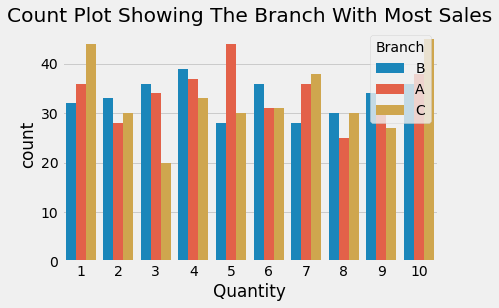

In [51]:
#branch with the most sales
sns.countplot('Quantity', data=xyz, hue= "Branch").set(title='Count Plot Showing The Branch With Most Sales')

[Text(0.5, 1.0, 'Count plot for Payment column')]

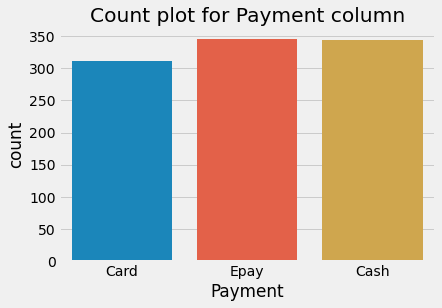

In [52]:
sns.countplot('Payment', data=xyz).set(title='Count plot for Payment column')

[Text(0.5, 1.0, 'Count plot for City column')]

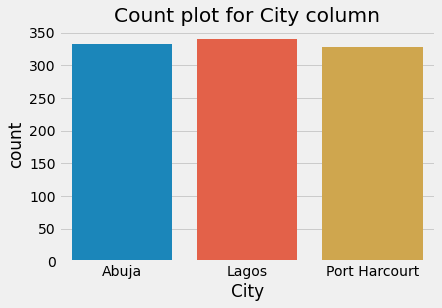

In [53]:
sns.countplot('City', data=xyz).set(title='Count plot for City column')

[Text(0.5, 1.0, 'Count Plot for Product line')]

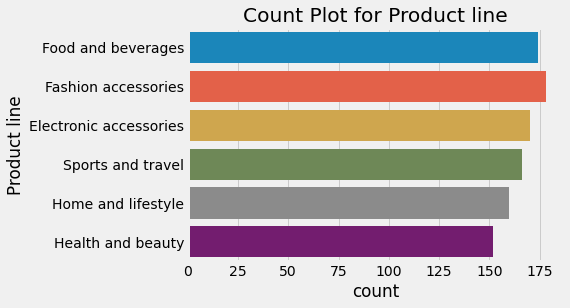

In [54]:
sns.countplot(y='Product line', data= xyz).set(title='Count Plot for Product line')

[Text(0.5, 1.0, 'Count plot showing the payment channel for product line')]

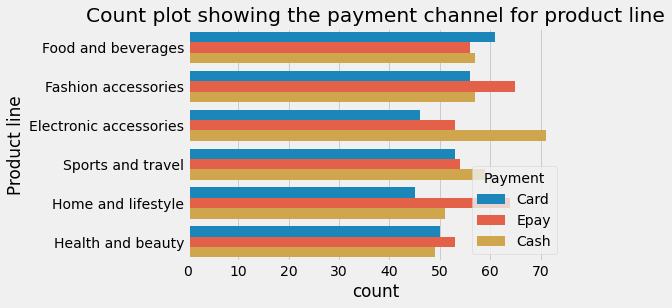

In [55]:
sns.countplot(y='Product line', data= xyz, hue='Payment').set(title='Count plot showing the payment channel for product line')

[Text(0.5, 1.0, 'Payment channel for each branch')]

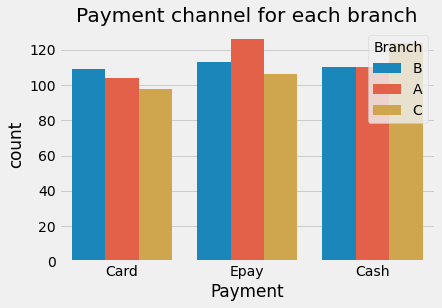

In [56]:
sns.countplot('Payment', data= xyz, hue='Branch').set(title='Payment channel for each branch')

<AxesSubplot:xlabel='Branch', ylabel='Rating'>

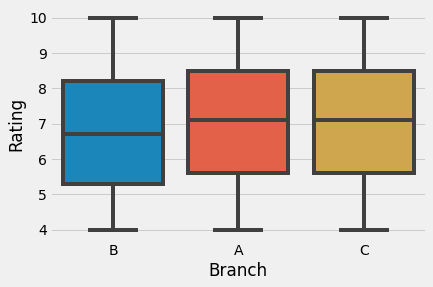

In [57]:
sns.boxplot(x='Branch', y='Rating', data=xyz)

##### Branch B has the lowest rating

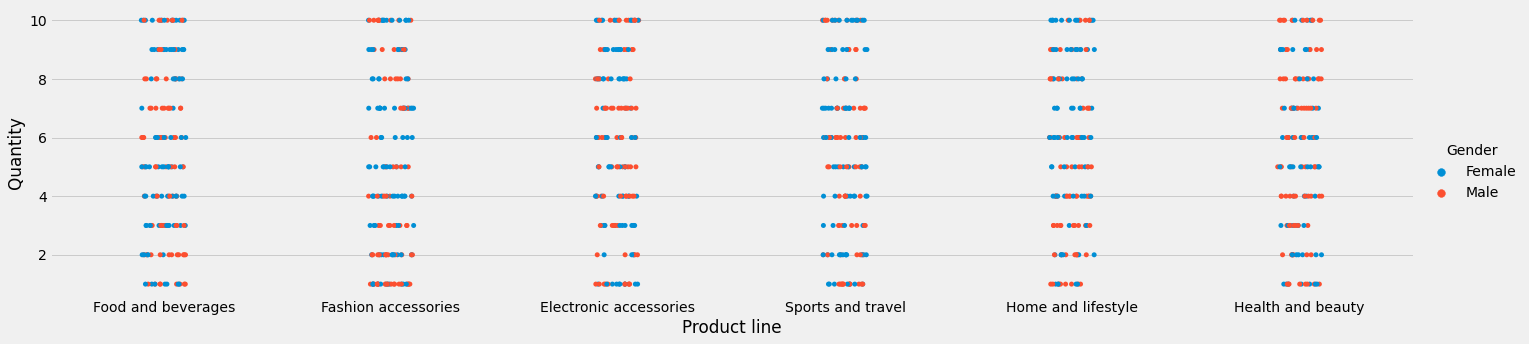

In [58]:
sns.catplot(x='Product line', y='Quantity', data=xyz, hue='Gender', aspect=4)

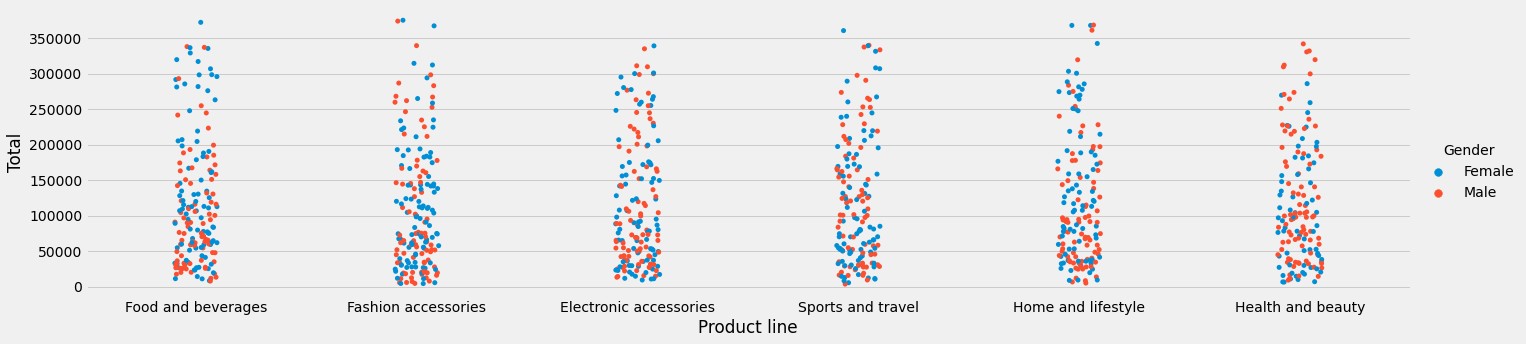

In [59]:
sns.catplot(x='Product line', y='Total', data=xyz, hue='Gender', aspect=4)

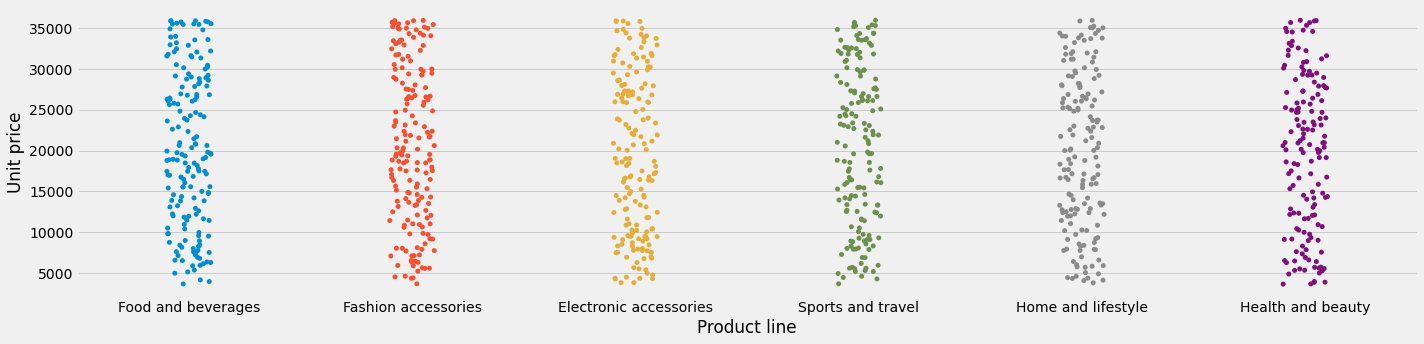

In [60]:
sns.catplot(x='Product line', y='Unit price', data=xyz, aspect=4)

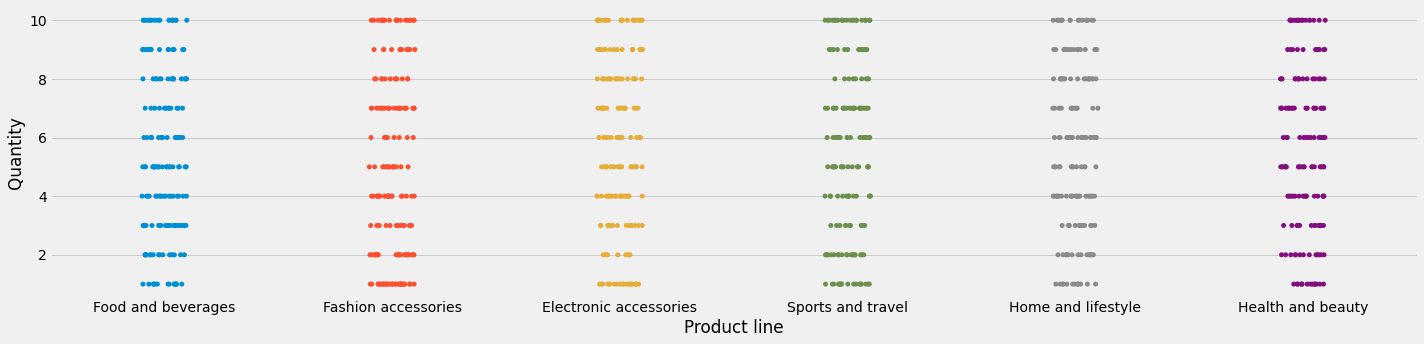

In [61]:
sns.catplot(x='Product line', y='Quantity', data=xyz, aspect=4)

# Standout Section

[Text(0.5, 1.0, 'Count plot showing the gender as related to product line')]

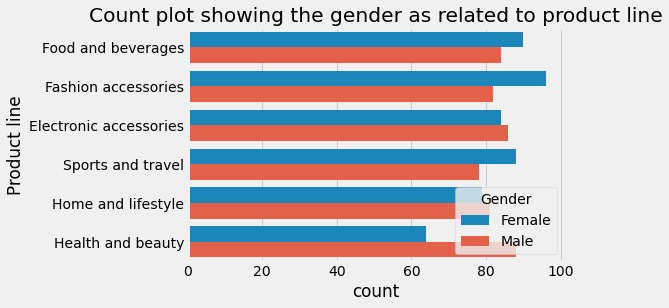

In [62]:
sns.countplot(y='Product line', data= xyz, hue='Gender').set(title='Count plot showing the gender as related to product line')

[Text(0.5, 1.0, 'Count plot showing the product line versus the customer type')]

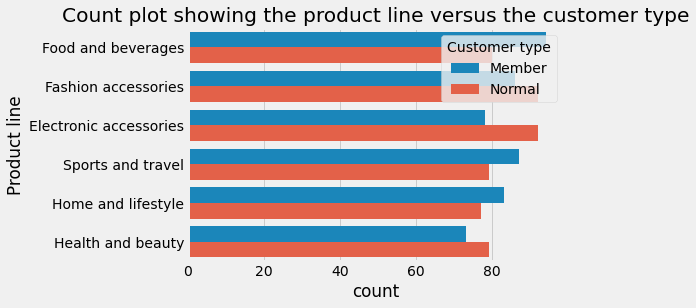

In [63]:
sns.countplot(y='Product line', data= xyz, hue='Customer type').set(title='Count plot showing the product line versus the customer type')

# Insights from the analysis

###### The following includes the insights from the data analysis and visualizations above:
###### 1. There was no record of missing data.
###### 2.  Branch C which is located in Port Harcourt has the most average tax paid.
###### 3. Branch C  has the highest total gross income.
###### 4. Branch A (Lagos) has more sales than the other two branches.
###### 5.  The mostly used payment channel is Epay.
###### 6. The products (Food and Beverages, Fashion Accessories, and Sports and Travel) was  patronized by more females than males.
###### 7. The product Health and Beauty has more male customers than females.
###### 8. There were more 'Normal' customers than 'Member' customers.